In [1]:
import os
from arosics import COREG
from arosics import COREG_LOCAL
from geoarray import GeoArray
import rasterio as rio

In [2]:
os.chdir(r'path\to\input_folder')

In [3]:
data = (os.listdir('.'))
files = []
for item in data:
    if item.endswith('.tiff'):
        files.append(item)
files = sorted(list(set(files)))
print('First Image: ', files[0],'\n',
      'Last Image: ', files[-1])
print(files)

First Image:  20190921_dos.tiff 
 Last Image:  20200915_dos.tiff
['20190921_dos.tiff', '20200915_dos.tiff']


In [7]:
for i in range(0,len(files)-1):
    first = f'{files[0]}' # 0 for fixed master, i for moving
    # first = f'{files[i]}'
    # get a sample numpy array with corresponding geoinformation as reference image

    geoArr  = GeoArray(first)
    print("first" + first)

    ref_ndarray = geoArr[:]            # numpy.ndarray with shape (10980, 10980)

    ref_gt      = geoArr.geotransform  # GDAL geotransform: (300000.0, 10.0, 0.0, 5900040.0, 0.0, -10.0)

    ref_prj     = geoArr.projection    # projection as WKT string ('PROJCS["WGS 84 / UTM zone 33N....')

    second = f'{files[i+1]}'
    # get a sample numpy array with corresponding geoinformation as target image

    geoArr  = GeoArray(second)
    print("second" + second)

    tgt_ndarray = geoArr[:]            # numpy.ndarray with shape (10980, 10980)

    tgt_gt      = geoArr.geotransform  # GDAL geotransform: (300000.0, 10.0, 0.0, 5900040.0, 0.0, -10.0)

    tgt_prj     = geoArr.projection    # projection as WKT string ('PROJCS["WGS 84 / UTM zone 33N....')

    # create in-memory instances of GeoArray from the numpy array data, the GDAL geotransform tuple and the WKT
    # projection string
    geoArr_reference = GeoArray(ref_ndarray, ref_gt, ref_prj)

    geoArr_target    = GeoArray(tgt_ndarray, tgt_gt, tgt_prj)

    # GLOBAL COREG
    #     CR = COREG(geoArr_reference, geoArr_target, path_out=fr'.\aligned_fixed_master_300\{second}',
    #                max_iter=10000, max_shift=10, match_gsd=False, ws = (300,300), align_grids=True)
    #     CR.calculate_spatial_shifts()
    #     CR.correct_shifts()

    # LOCAL COREG
    kwargs = {
        'grid_res': 4,
        'window_size'  : (10,10),
        'path_out'     : fr'path\to\output_folder',
        'max_iter'     : 1000,
        'max_shift'    : 10,
        'match_gsd'    : False,
        'q'            : False,
        'tieP_filter_level' : 1,
        'min_reliability' : 79,
        'rs_tolerance'   : 5,
    }

    CRL = COREG_LOCAL(geoArr_reference,geoArr_target,**kwargs)
    CRL.correct_shifts()

Polygonize progress     |==================================================| 100.0% Complete  => 0:00:00
Polygonize progress     |===================================================| 101.3% Complete  => 0:00:00


firstC:/Users/lawfr/Desktop/RGB_images_UAV/aligned/20200915_clipped.tif
secondC:/Users/lawfr/Desktop/RGB_images_UAV/aligned/75.tif
Calculating footprint polygon and actual data corner coordinates for reference image...
Bounding box of calculated footprint for reference image:
	(611270.0, 5143670.0, 612130.0, 5144380.0)
Calculating footprint polygon and actual data corner coordinates for image to be shifted...
Automatically detected nodata value for GeoArray_CoReg 'IN_MEM': 0.0
Bounding box of calculated footprint for image to be shifted:
	(611270.0, 5143670.0, 612130.0, 5144380.0)
Matching window position (X,Y): 611680.7189542484/5144016.131535947


C:\Users\lawfr\anaconda3\envs\hist_match\lib\site-packages\IPython\core\interactiveshell.py:3444: UserWarning: 
First attempt to check the functionality of co-registration failed. Check your input data and parameters. The following error occurred:
  exec(code_obj, self.user_global_ns, self.user_ns)


RuntimeError: One of the input images does not have sufficient gray value information (non-no-data values) for placing a matching window at the position (611680.7189542484, 5144016.131535947). Matching failed.

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

:HoloMap   [image]
   :Image   [x,y]   (z)
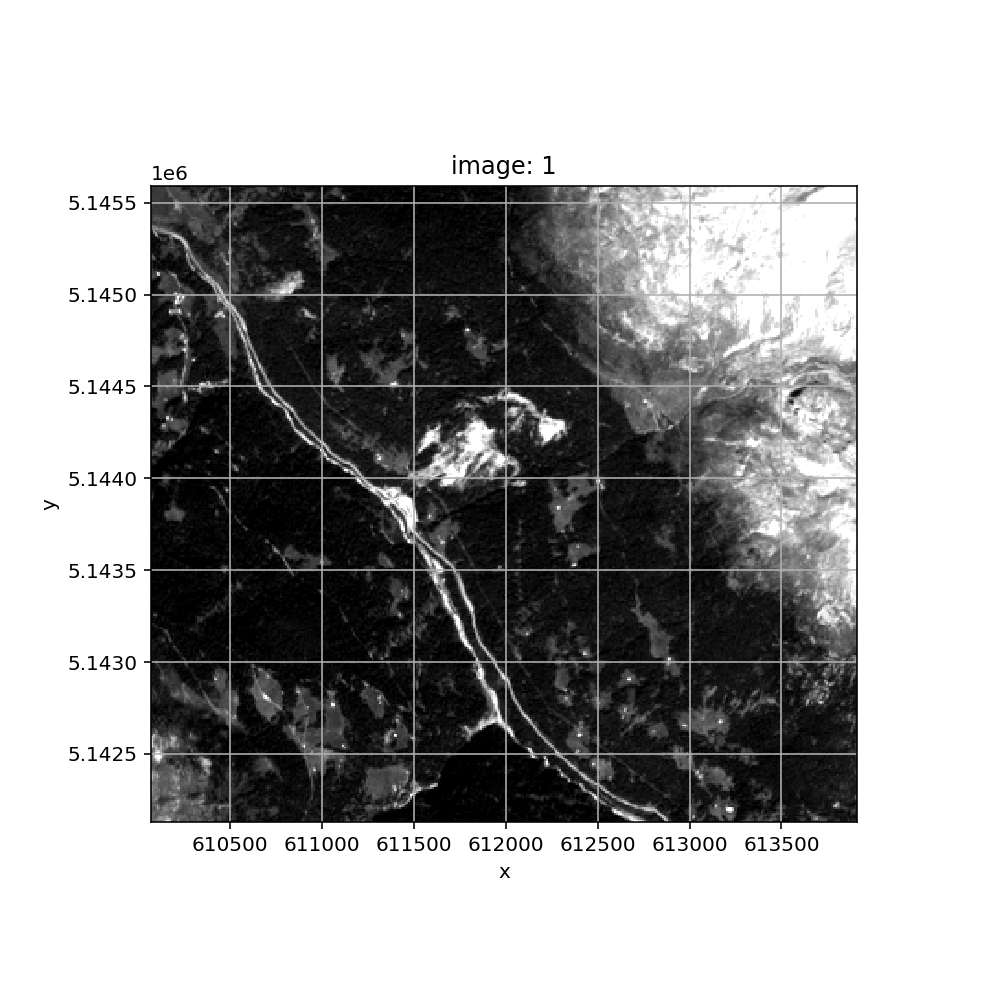
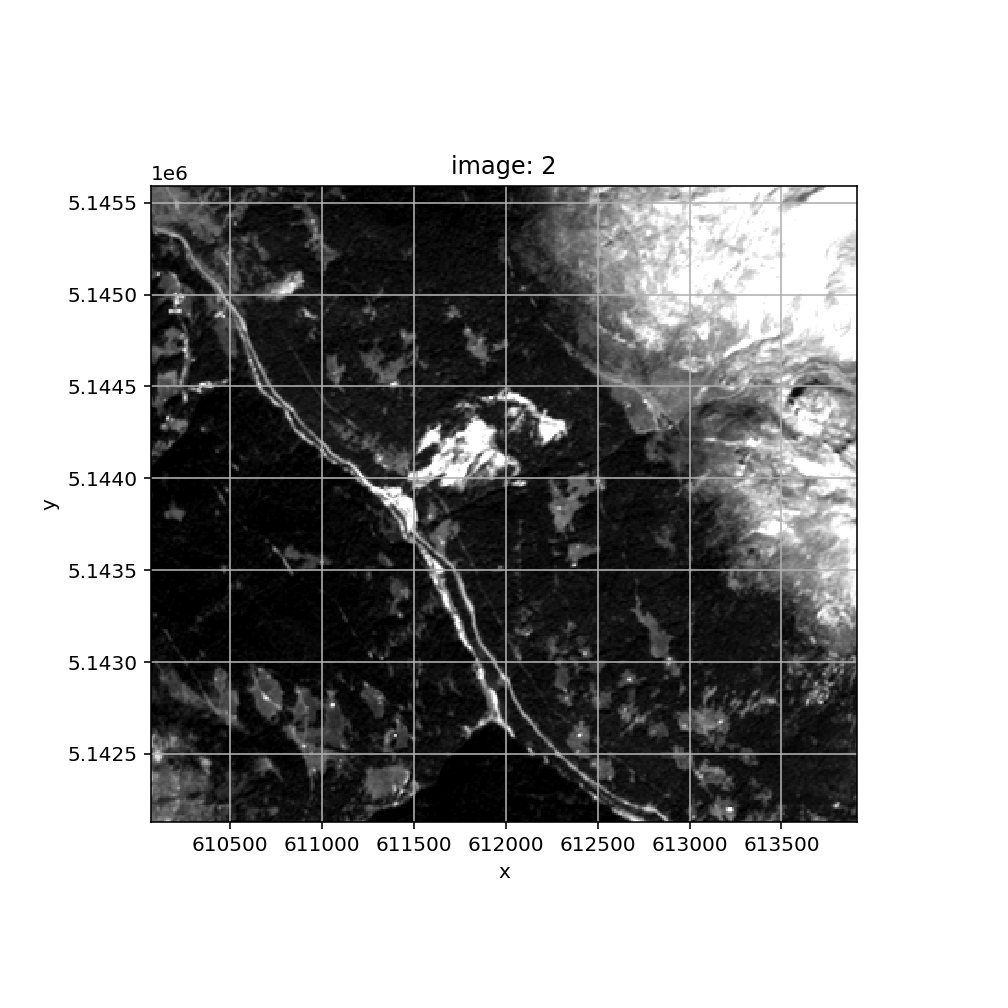
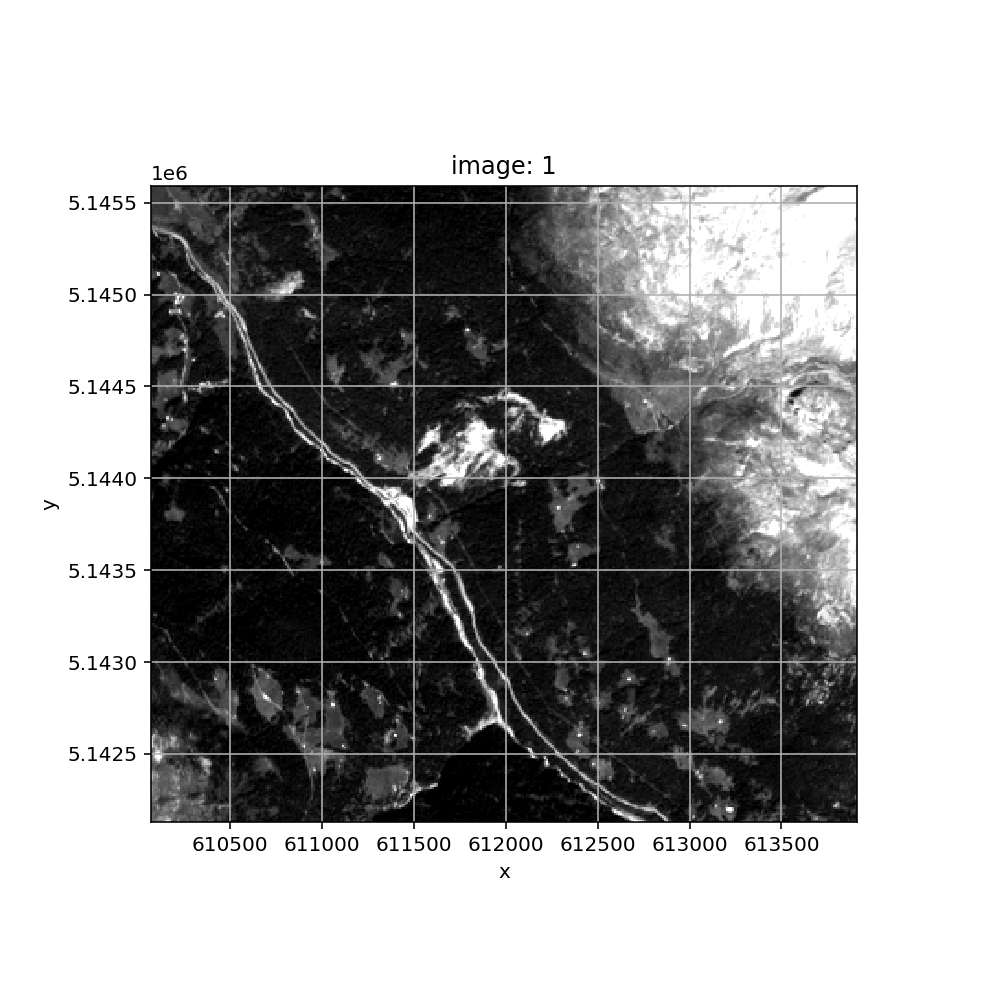

In [13]:
CR.show_matchWin(figsize=(7, 7), interactive=True, after_correction=True, pmin=5, pmax=95)

In [14]:
CR.show_cross_power_spectrum(interactive=True)

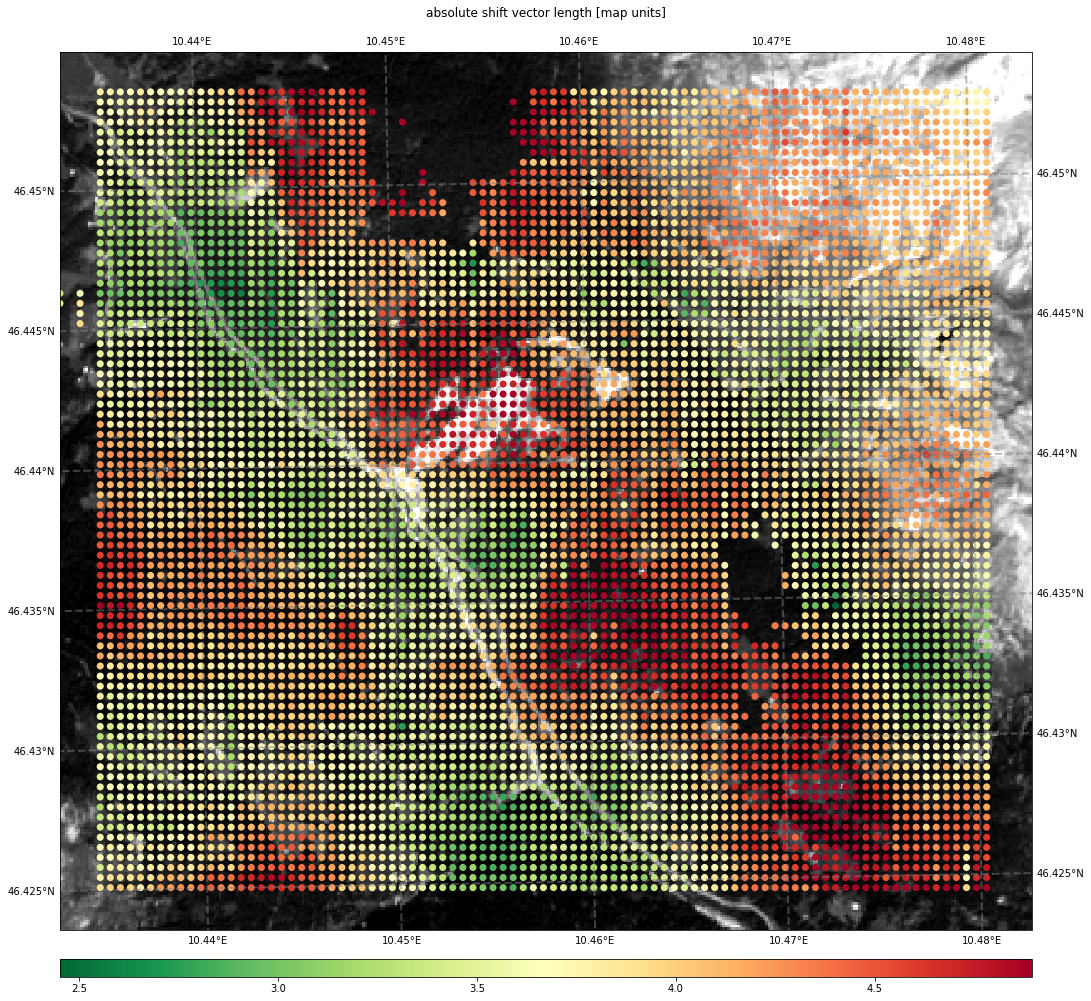

In [5]:
#only after Local CoReg
CRL.view_CoRegPoints(figsize=(15,15), backgroundIm='ref')